# Unsupervised Learning



In this lab we demonstrate PCA and clustering on several datasets.
As in other labs, we import some of our libraries at this top
level. This makes the code more readable, as scanning the first few
lines of the notebook tell us what libraries are used in this
notebook.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.preprocessing import StandardScaler
from ISLP import load_data

In [5]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from ISLP.cluster import compute_linkage

## Clustering

### $K$-Means Clustering

The estimator `sklearn.cluster.KMeans()`  performs $K$-means clustering in
`Python`.  We begin with a simple simulated example in which there
truly are two clusters in the data: the first 25 observations have a
mean shift relative to the next 25 observations.

In [6]:
np.random.seed(0);
X = np.random.standard_normal((50,2));
X[:25,0] += 3;
X[:25,1] -= 4;


In [7]:
print(X.shape)
print(X[:5])  # Inspect the first 5 rows of X


(50, 2)
[[ 4.76405235 -3.59984279]
 [ 3.97873798 -1.7591068 ]
 [ 4.86755799 -4.97727788]
 [ 3.95008842 -4.15135721]
 [ 2.89678115 -3.5894015 ]]


We now perform $K$-means clustering with $K=2$.

In [8]:
kmeans = KMeans(n_clusters=2,
                random_state=2,
                n_init=20).fit(X)


We specify `random_state` to make the results reproducible.  The cluster assignments of the 50 observations are contained in `kmeans.labels_`.

In [9]:
kmeans.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

The $K$-means clustering perfectly separated the observations into two
clusters even though we did not supply any group information to
`KMeans()`. We can plot the data, with each observation
colored according to its cluster assignment.

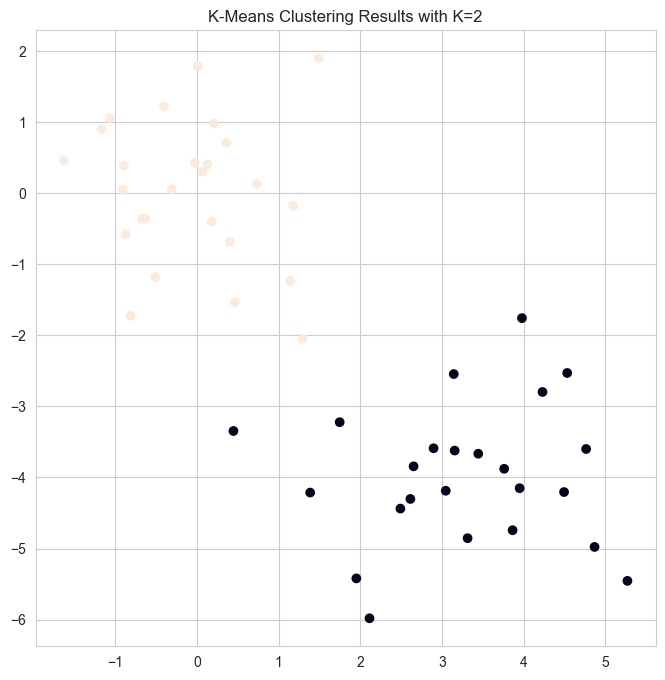

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");



In this example,   we knew that there really
were two clusters because we generated the data. However, for real
data, we do not know the true number of clusters, nor whether they  exist in any precise way. We could
instead have performed $K$-means clustering on this example with
$K=3$.

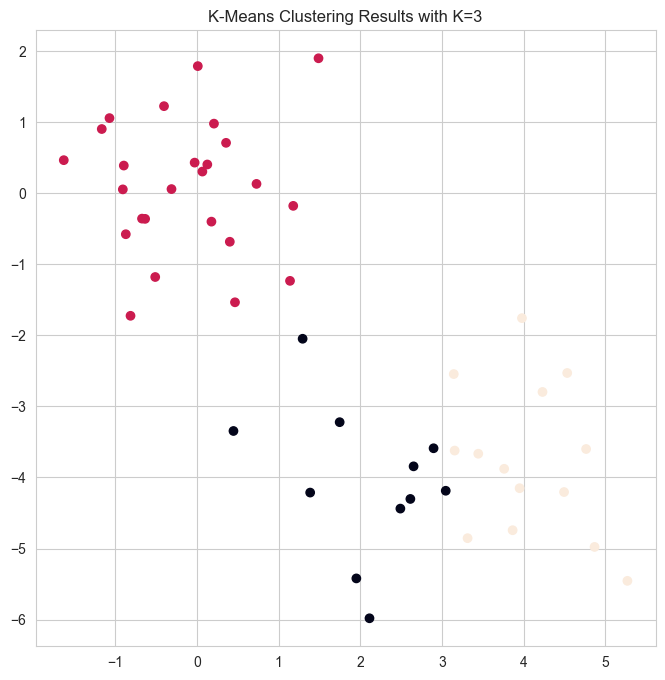

In [11]:
kmeans = KMeans(n_clusters=3,
                random_state=3,
                n_init=20).fit(X)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=3");


When $K=3$, $K$-means clustering  splits up the two clusters.
We have used the `n_init` argument to run the $K$-means with 20
initial cluster assignments (the default is 10). If a
value of `n_init` greater than one is used, then $K$-means
clustering will be performed using multiple random assignments in
Step 1 of  Algorithm~\ref{Ch10:alg:km}, and the `KMeans()`
function will report only the best results. Here we compare using
`n_init=1` to `n_init=20`.

In [12]:
kmeans1 = KMeans(n_clusters=3,
                random_state=3,
                n_init=1).fit(X)

kmeans20 = KMeans(n_clusters=3,
                  random_state=3,
                  n_init=20).fit(X);

kmeans1.inertia_, kmeans20.inertia_


(76.85131986999252, 75.06261242745384)

Note that `kmeans.inertia_` is the total within-cluster sum
of squares, which we seek to minimize by performing $K$-means
clustering

We *strongly* recommend always running $K$-means clustering with
a large value of `n_init`, such as 20 or 50, since otherwise an
undesirable local optimum may be obtained.

When performing $K$-means clustering, in addition to using multiple
initial cluster assignments, it is also important to set a random seed
using the `random_state` argument to `KMeans()`. This way, the initial
cluster assignments in Step 1 can be replicated, and the $K$-means
output will be fully reproducible.

# Activity: K-Means Clustering on the Iris Dataset


Apply the `K-Means` clustering algorithm to the Iris dataset and analyze the results. The goal is to group the Iris flower species based on the four features: `sepal length`, `sepal width`, `petal length`, and `petal width`.

- Load the Iris Dataset:

Begin by loading the Iris dataset, which contains 150 samples and 4 features for each sample.

In [13]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

Question: What are the features in the Iris dataset? How many samples are in the dataset?


In [18]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.head()
X.shape

(150, 4)

### Answer:
Features:
- `sepal length (cm)`
- `sepal width (cm)`
- `petal length (cm)`
- `petal width (cm)`

Samples: 150

- Apply K-Means Clustering: Use K-Means clustering with
𝑘
=3
k=3 to group the flowers into 3 clusters (since there are 3 species in the dataset).

In [19]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=20)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=20, random_state=42)

- Get Cluster Labels: After fitting the K-Means model, get the cluster labels for each observation.

In [20]:
cluster_labels = kmeans.labels_


Question: What do the cluster labels represent? How can we use them to analyze the grouping of data?

### Answer:
The cluster labels represent the group assignments for each data point as determined by the K-Means clustering algorithm. They can be used to analyze the grouping of data by visualizing the clusters, comparing with true labels, and examining cluster characteristics.

- Visualize the Clusters: Visualize the clustering results by plotting the first two features: sepal length and sepal width.

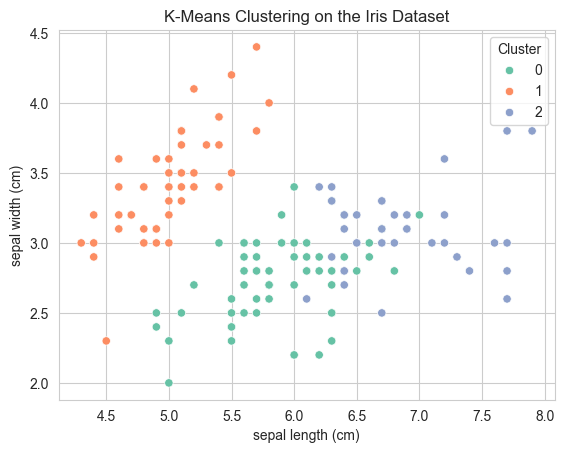

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

X['Cluster'] = cluster_labels
sns.scatterplot(data=X, x='sepal length (cm)', y='sepal width (cm)', hue='Cluster', palette='Set2')
plt.title('K-Means Clustering on the Iris Dataset')
plt.show()

Question: write your obesrvation..

### Answer:
### Observation:
The K-Means clustering algorithm grouped the Iris dataset into three clusters. By visualizing the clusters using the first two features (sepal length and sepal width), i observe:

1. Clusters are well-separated, indicating distinct groups.
2. Some overlap between clusters due to feature similarity among species.
3. Visualization helps me understand cluster distribution, but analyzing all four features provides a comprehensive understanding.

- Compare with True Labels: Compare the clustering results (labels) with the true species labels from the dataset.

In [22]:
true_labels = iris.target


Question: How well do the K-Means clusters match the true species labels? What might explain any mismatches?

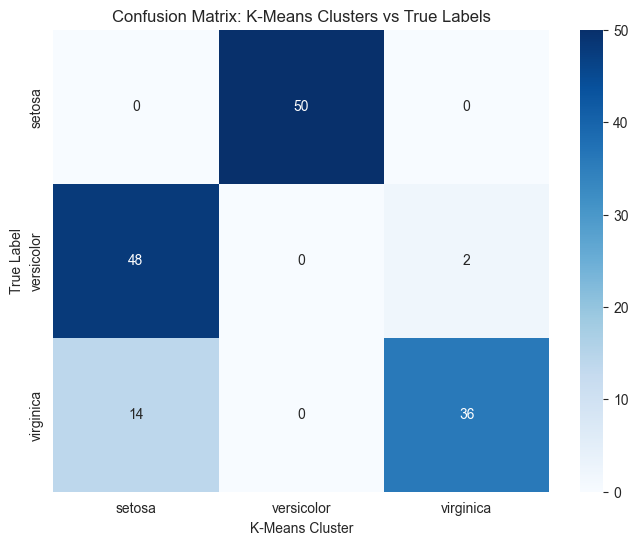

In [25]:
# Confusion matrix
conf_matrix = confusion_matrix(true_labels, cluster_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('K-Means Cluster')
plt.ylabel('True Label')
plt.title('Confusion Matrix: K-Means Clusters vs True Labels')
plt.show()

### Explanation:
1. The confusion matrix shows how the K-Means clusters correspond to the true species labels.
2. Mismatches may occur due to overlapping features among different species, making it difficult for the algorithm to distinguish between them. Additionally, K-Means clustering is based on feature similarity, which may not always align perfectly with the true species classification.

# Hierarchical Clustering

The `AgglomerativeClustering()`  class from
the `sklearn.clustering` package implements hierarchical clustering.
As its
name is long, we use the short hand `HClust` for *hierarchical clustering*. Note that this will not change the return type
when using this method, so instances will still be of class `AgglomerativeClustering`.
In the following example we use the data from the previous lab to plot the hierarchical clustering
dendrogram using complete, single, and average linkage clustering
with Euclidean distance as the dissimilarity measure.  We begin by
clustering observations using complete linkage.

# What is Linkage?
Linkage decides how clusters are merged based on the distance between them:
- Complete Linkage: Merges clusters based on the farthest points in the two clusters.
- Single Linkage: Merges clusters based on the closest points in the two clusters.
- Average Linkage: Merges clusters based on the average distance between all points in the two clusters.

In [26]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp.fit(X)


AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

This computes the entire dendrogram.
We could just as easily perform hierarchical clustering with average or single linkage instead:

In [27]:
hc_avg = HClust(distance_threshold=0,
                n_clusters=None,
                linkage='average');
hc_avg.fit(X)
hc_sing = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='single');
hc_sing.fit(X);


To use a precomputed distance matrix, we provide an additional
argument `metric="precomputed"`. In the code below, the first four lines computes the $50\times 50$ pairwise-distance matrix.

In [28]:
D = np.zeros((X.shape[0], X.shape[0]));
for i in range(X.shape[0]):
    x_ = np.multiply.outer(np.ones(X.shape[0]), X[i])
    D[i] = np.sqrt(np.sum((X - x_)**2, 1));
hc_sing_pre = HClust(distance_threshold=0,
                     n_clusters=None,
                     metric='precomputed',
                     linkage='single')
hc_sing_pre.fit(D)


KeyError: 0

We use
`dendrogram()` from `scipy.cluster.hierarchy` to plot the dendrogram. However,
`dendrogram()` expects a so-called *linkage-matrix representation*
of the clustering, which is not provided by `AgglomerativeClustering()`,
but can be computed. The function `compute_linkage()` in the
`ISLP.cluster` package is provided for this purpose.

We can now plot the dendrograms. The numbers at the bottom of the plot
identify each observation. The `dendrogram()` function has a default method to
color different branches of the tree that suggests a pre-defined cut of the tree at a particular depth.
We prefer to overwrite this default by setting this threshold to be infinite. Since we want this behavior for many dendrograms, we store these values in a dictionary `cargs` and pass this as keyword arguments using the notation `**cargs`.

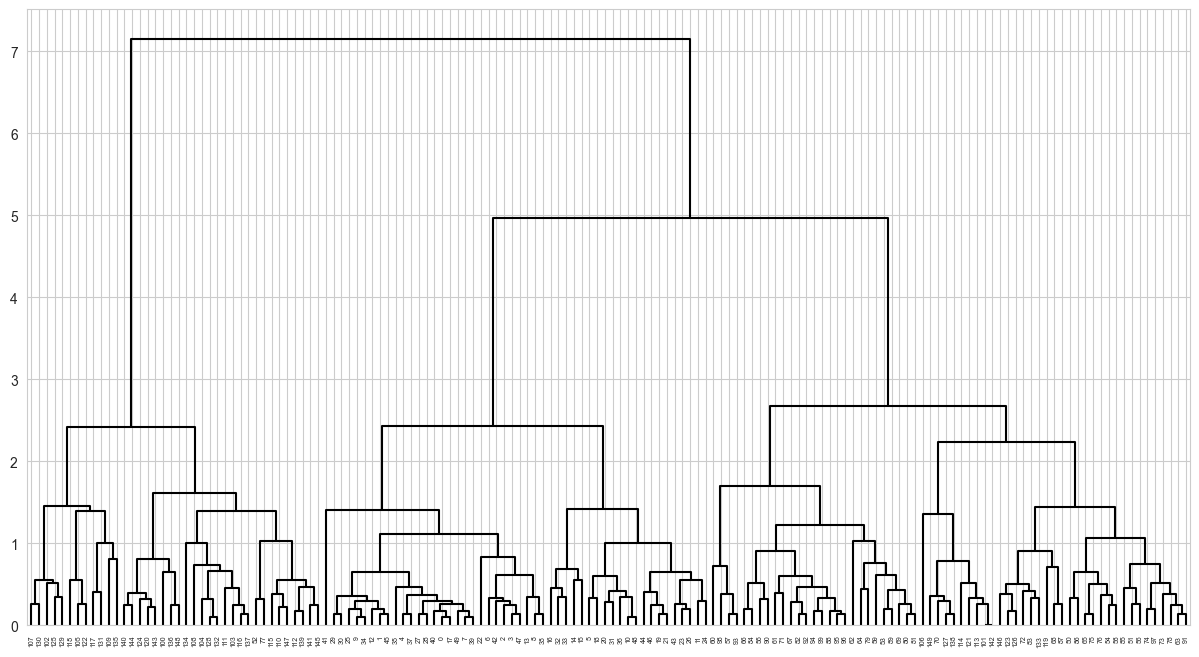

In [56]:
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
dendrogram(linkage_comp,
           ax=ax,
           **cargs);


We may want to color branches of the tree above
and below a cut-threshold differently. This can be achieved
by changing the `color_threshold`. Let’s cut the tree at a height of 4,
coloring links that merge above 4 in black.

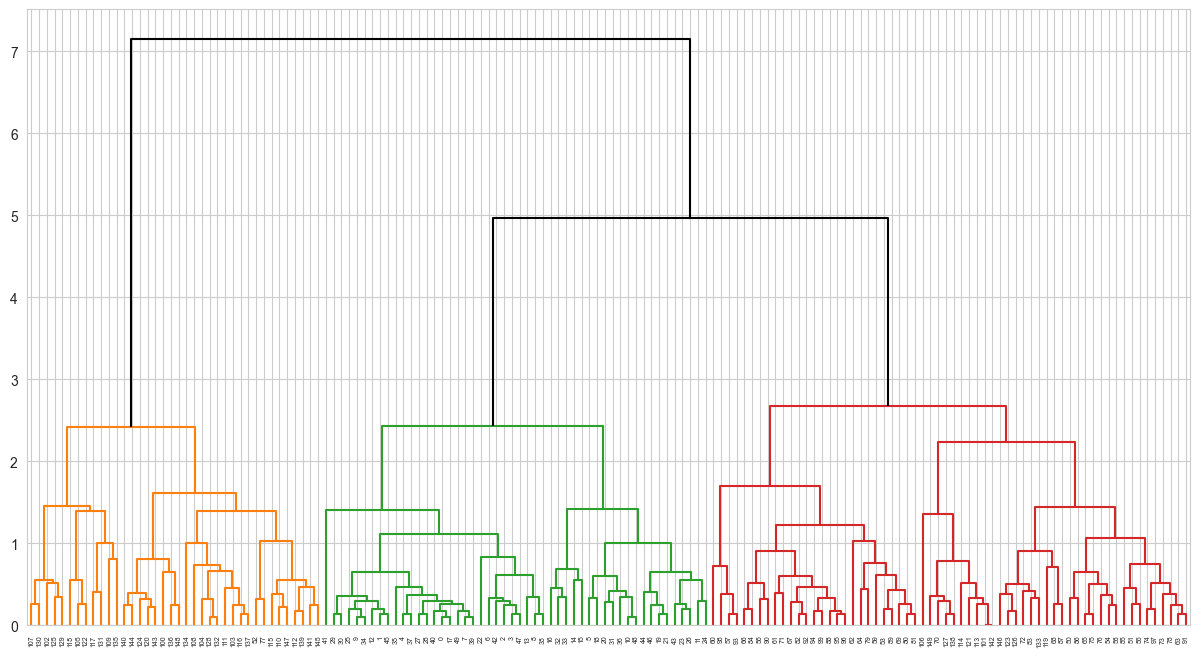

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
dendrogram(linkage_comp,
           ax=ax,
           color_threshold=4,
           above_threshold_color='black');


To determine the cluster labels for each observation associated with a
given cut of the dendrogram, we can use the `cut_tree()`
function from `scipy.cluster.hierarchy`:

In [31]:
cut_tree(linkage_comp, n_clusters=4).T


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1,
        3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 2, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1,
        3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1]])

This can also be achieved by providing an argument `n_clusters`
to `HClust()`; however each cut would require recomputing
the clustering. Similarly, trees may be cut by distance threshold
with an argument of `distance_threshold` to `HClust()`
or `height` to `cut_tree()`.

# Activity: Hierarchical Clustering on the Iris Dataset

Load the Dataset: Start by loading the Iris dataset using the following code:



In [41]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

- Perform Hierarchical Clustering: Use Agglomerative Clustering and create a dendrogram:

### solution

In [51]:
#  Hierarchical Clustering with complete linkage
hc = AgglomerativeClustering(n_clusters=3, linkage='complete')
hc.fit(X)

#  linkage matrix
Zc = linkage(X, method='complete')



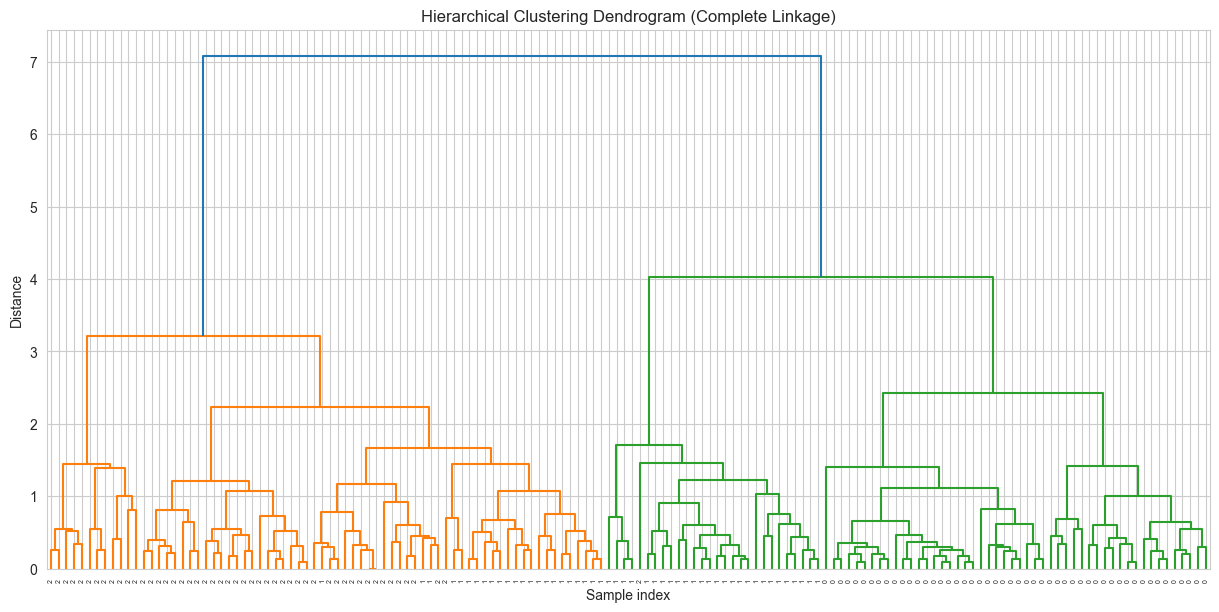

In [52]:
# Plot dendrogram
plt.figure(figsize=(15, 7))
dendrogram(Zc, labels=iris.target)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [53]:
#  Hierarchical Clustering with average linkage
hc = AgglomerativeClustering(n_clusters=3, linkage='average')
hc.fit(X)
#  linkage matrix
Za = linkage(X, method='average')

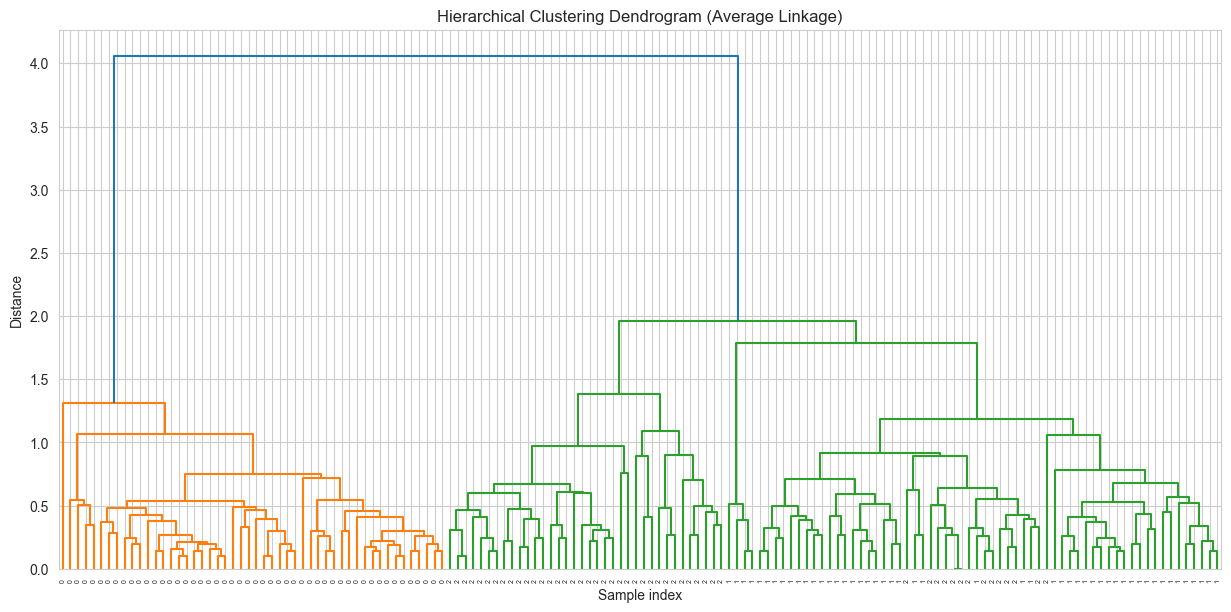

In [54]:
# Plot dendrogram
plt.figure(figsize=(15, 7))
dendrogram(Za, labels=iris.target)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

### Observation:

1. **Complete Linkage**:
   - The dendrogram shows that clusters are formed based on the farthest points between clusters.
   - This often results in more compact clusters with larger distances between them.
   - The clusters tend to be more balanced in size.

2. **Average Linkage**:
   - The dendrogram shows that clusters are formed based on the average distance between all points in the clusters.
   - This method tends to create clusters that are more spread out and can handle varying cluster sizes better.
   - The clusters may not be as compact as those formed by complete linkage.

in conclusion,  Complete linkage is useful for creating compact clusters, while average linkage is better for handling clusters of different sizes.